In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

In [2]:
# Filepath
filepath = "random_v3_df.csv"

# Read the CSV file, converting relevant columns to correct data types
df = pd.read_csv(filepath)

In [6]:
# Data Cleaning
# Remove dollar signs and commas from currency columns
df['Budget_$'] = df['Budget_$'].str.replace('[$,]', '', regex=True)
df['Domestic_$'] = df['Domestic_$'].str.replace('[$,]', '', regex=True)
df['International_$'] = df['International_$'].str.replace('[$,]', '', regex=True)
df['total_revenue_$'] = df['total_revenue_$'].str.replace('[$,]', '', regex=True)

In [7]:
# Data Cleaning
# Convert currency columns to numeric data types
df['Budget_$'] = pd.to_numeric(df['Budget_$'], errors='coerce')
df['Domestic_$'] = pd.to_numeric(df['Domestic_$'], errors='coerce')
df['International_$'] = pd.to_numeric(df['International_$'], errors='coerce')
df['total_revenue_$'] = pd.to_numeric(df['total_revenue_$'], errors='coerce')

In [9]:
# Research Question:  Is there a difference in movie genre popularity in the U.S. versus the international market?
    # Genre: Domestic vs International

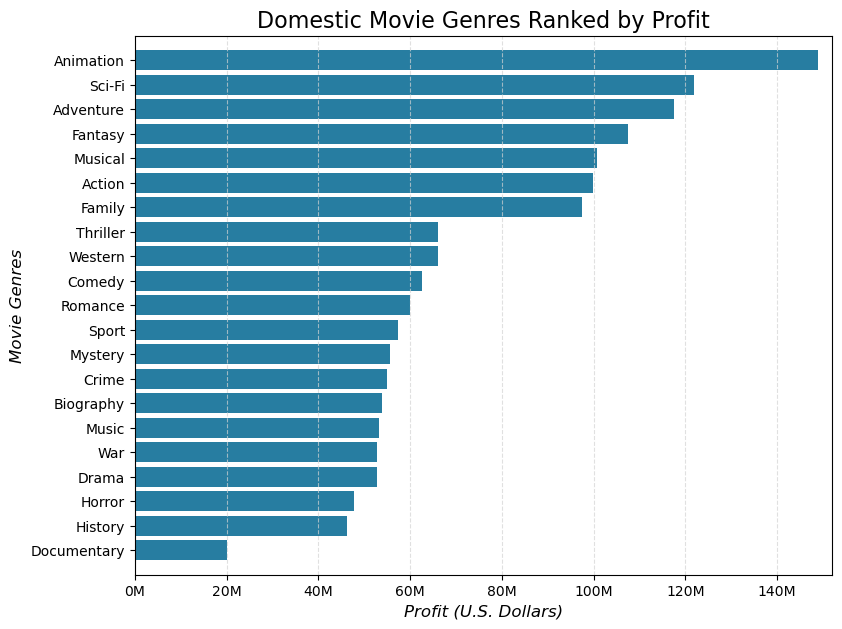

In [54]:
# Domestic Bar Chart
profit_by_genre_domestic = df.groupby("main_genre")["Domestic_$"].mean().sort_values(ascending=True)
x = list(profit_by_genre_domestic.index)
y = list(profit_by_genre_domestic.values)

# Create canvas
plt.figure(figsize=(9,7))

# Create base plot
plt.barh(x, y, color = "#277DA1")

# Plot customization
plt.xlabel("Profit (U.S. Dollars)", fontsize=12, fontstyle="italic")
plt.ylabel("Movie Genres", fontsize=12, fontstyle="italic")
plt.title("Domestic Movie Genres Ranked by Profit", fontsize=16)
plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.7)
plt.xlim(0,152000000)
plt.ylim(-1,21)

# Format y-ticks
# Get the current axes
ax = plt.gca()

# Set the y-axis tick label formatter to use standard notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.xaxis.get_major_formatter().set_scientific(False)

# Define a function to format the tick labels in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

# Set the y-axis tick label formatter to display values in millions
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Define a function to format the tick labels in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

plt.show()

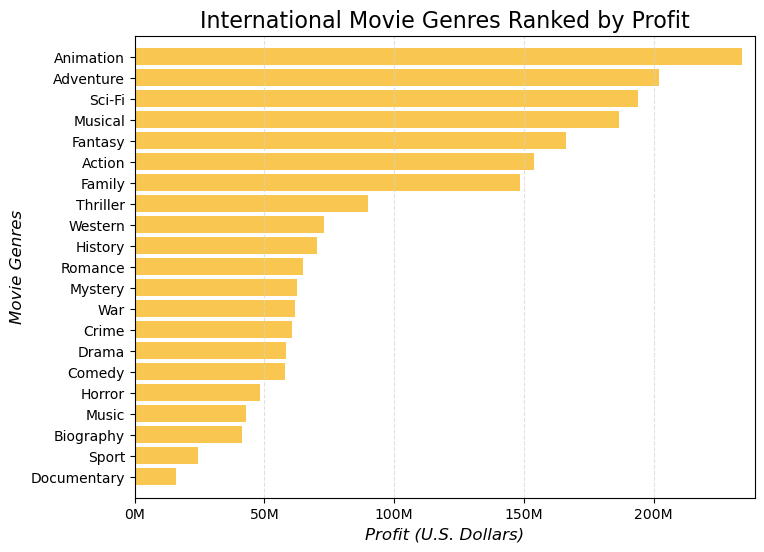

In [53]:
# International Bar Chart

profit_by_genre_international = df.groupby("main_genre")["International_$"].mean().sort_values(ascending=True)
x = list(profit_by_genre_international.index)
y = list(profit_by_genre_international.values)

# Create canvas
plt.figure(figsize=(8,6))

# Create base plot
plt.barh(x, y, color = "#F9C74F")

# Plot customization
plt.xlabel("Profit (U.S. Dollars)", fontsize=12, fontstyle="italic")
plt.ylabel("Movie Genres", fontsize=12, fontstyle="italic")
plt.title("International Movie Genres Ranked by Profit", fontsize=16)
plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.7)
plt.xlim(0,239000000)
plt.ylim(-1,21)

# Format Currency
# Get the current axes
ax = plt.gca()
# Set the y-axis tick label formatter to use standard notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.xaxis.get_major_formatter().set_scientific(False)

# Define a function to format the tick labels in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

# Set the y-axis tick label formatter to display values in millions
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
# Define a function to format the tick labels in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

plt.show()

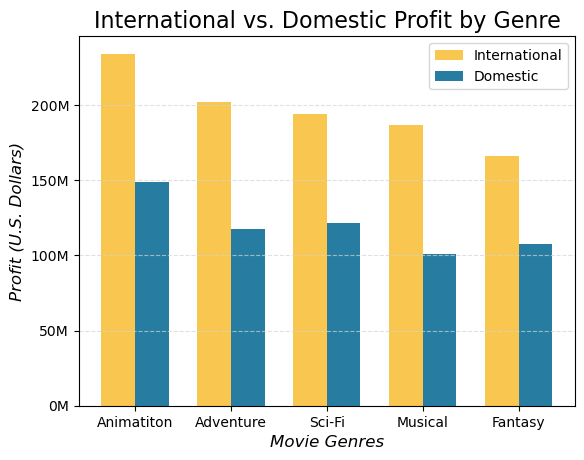

In [52]:
# Domestic vs International Group Bar Chart
international_profit = [234134325.19, 201888896.30, 194123172.05, 186787829.83, 166134348.98]
domestic_profit = [148981989.35, 117400435.17, 121809580.63, 100759973.75, 107387950.11]
top_genres = ["Animatiton", "Adventure", "Sci-Fi", "Musical", "Fantasy"]

# Xpert assisted code
x = np.arange(len(top_genres))
#Set the width of the bars:
bar_width = 0.35
#Plot the grouped bar chart:
fig, ax = plt.subplots()
bars1 = ax.bar(x - bar_width/2, international_profit, bar_width, label='International', color="#F9C74F")
bars2 = ax.bar(x + bar_width/2, domestic_profit, bar_width, label='Domestic', color="#277DA1")

# Get the current axes
ax = plt.gca()
# Set the y-axis tick label formatter to use standard notation
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(False)

# Define a function to format the tick labels in millions
def millions_formatter(y, pos):
    return f'{y/1e6:.0f}M'

# Set the y-axis tick label formatter to display values in millions
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Define a function to format the tick labels in millions
def millions_formatter(y, pos):
    return f'{y/1e6:.0f}M'
    
# Add labels, title, axis lines and legend
ax.set_xlabel('Movie Genres', fontsize=12, fontstyle="italic")
ax.set_ylabel('Profit (U.S. Dollars)', fontsize=12, fontstyle="italic")
ax.set_title('International vs. Domestic Profit by Genre', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(top_genres)
plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.7)
ax.legend()

plt.show()